# Table of Contents
1. [Getting Factors and EDA](#eda)
1. [Logistic Regression](#logistic)
1. [Logistic Regression (Reducing Overfitting)](#overfit)
1. [Random Forest](#forest)
1. [Decision Tree](#decision)
1. [Logistic Regression for Social Smoking](#social)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("Masterfile.csv")

In [3]:
df

,Recorded Date,Response ID,Age Range,Sex,Marital Status,Race/Ethnicity,Highest Education Qualification,Industry Sector,Type of Workplace,Type of Job,...,Do you think the law is too lenient?,Have you attempted to quit before?,What were your plans to quit? (What actions did you take to quit vaping? How long did you take to quit/planned to quit?),Were you successful?,Why would you say you were unsuccessful?,What were the reasons why you wanted to quit?,What is stopping you from quitting?,What are some resources that you think would help you quit?,Why do you think people do not quit vaping?,What are some resources that you think would help others quit?
0,7/10/2022 6:43,R_3ls6xSdXt1lvITA,25-35,Male,Married,Indian,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,...,No,Yes,Don't vape,No,Addiction,"Waste of money, health",NaN,NaN,NaN,NaN
1,7/10/2022 7:24,R_2YSo1WYlWuVotb9,25-35,Male,Married,Chinese,University and Above,Finance & Insurance,Small- to Medium-sized Corporations (SME),Full Time,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It is an addiction.,Exercise
2,7/10/2022 7:24,R_T61QuvGPno1H8qt,25-35,Male,Single,Chinese,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Act seh,Ban like chewing gum
3,7/10/2022 8:49,R_r6y3ReAhLkmtmRr,18-24,Male,Single,Malay,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It is the common misconception that vaping is ...,"Ads, showing the harmful effects of vaping."
4,7/10/2022 8:50,R_1H5khMe7YnYGW1a,18-24,Male,Single,Chinese,Post-Secondary (Non-Tertiary),Other Service Industries,Startup,Full Time,...,No,Yes,NaN,No,Peer pressure,Health,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,24/10/2022 23:11,R_21nzvVl7VHXadQi,18-24,Male,Single,Malay,Secondary,Other Service Industries,Self-Employed,Freelance,...,No,No,NaN,NaN,NaN,NaN,i dont it harmful,gym,NaN,NaN
71,25/10/2022 0:06,R_2wsMhV82Egyk122,18-24,Female,Single,Chinese,Post-Secondary (Non-Tertiary),Accommodation & Food Services,Multinational Corporation (MNC),Part Time,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it is addictive as it contains nicotine. it ap...,quit vaping counselling sessions and campaigns...
72,25/10/2022 1:42,R_12okMkfKeVZq4Bw,18-24,Female,Single,Chinese,University and Above,Other Service Industries,Self-Employed,Freelance,...,No,Yes,"i don't vape enough, just out of curiosity so ...",Yes,NaN,not interested in it,NaN,NaN,NaN,NaN
73,25/10/2022 1:43,R_A0toCcBEB2a4ETf,25-35,Male,Single,Others,University and Above,Business Services,Small- to Medium-sized Corporations (SME),Full Time,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lack of stress


In [60]:
df[df['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'] == 'Yes']['Have you vaped before?'].value_counts()

Yes    15
No      3
Name: Have you vaped before?, dtype: int64

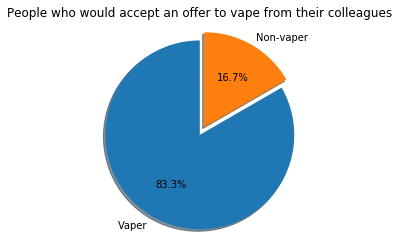

In [64]:
sizes = [15,3]
explode = (0,0.1)
labels = ['Vaper','Non-vaper']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('People who would accept an offer to vape from their colleagues')

plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 55 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   Recorded Date                                                                                                                                      75 non-null     object
 1   Response ID                                                                                                                                        75 non-null     object
 2   Age Range                                                                                                                                          75 non-null     object
 3   Sex              

In [5]:
df.dropna(axis=0,subset=["Punishment for vaping (1st time)","Race/Ethnicity"],inplace=True)

In [6]:
df.columns

Index(['Recorded Date', 'Response ID', 'Age Range', 'Sex', 'Marital Status',
       'Race/Ethnicity', 'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Have you vaped before?', 'What is the frequency of your vape usage?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Why did you start vaping despite its illegality? - Others - Text',
       'Why did you continue vaping after trying it? - Selected Choice',
       'Why did you continue vaping after trying it? - Others - Text',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Yes - Text',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do you thin

<a id="eda"></a>
<h1>Getting the factors and EDA</h1>

In [7]:
df.columns

Index(['Recorded Date', 'Response ID', 'Age Range', 'Sex', 'Marital Status',
       'Race/Ethnicity', 'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Have you vaped before?', 'What is the frequency of your vape usage?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Why did you start vaping despite its illegality? - Others - Text',
       'Why did you continue vaping after trying it? - Selected Choice',
       'Why did you continue vaping after trying it? - Others - Text',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Yes - Text',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do you thin

In [8]:
df["If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Yes - Text"].value_counts()

Cause is not professional                                                                                                                                                                                                                                                                1
Working relationship                                                                                                                                                                                                                                                                     1
even though i vape socially but i try to avoid vaping in general. hence if my boss offers it to me, there’s a certain professionalism or rather image that i might break if i accept it but at the same time it might be rude to not accept it. in conclusion, yes i feel pressured.     1
just like drinking, professional courtesy to accept                                                                                                    

In [9]:
df_factors = df[['Age Range', 'Sex', 'Marital Status',
       'Race/Ethnicity', 'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?','Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
                'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice','Do your Parents Smoke/Vape?',
                 'Do you know any close family members/friends that have smoking/vaping related illnesses?','Rate the following levels regarding your workplace - Job Satisfaction',
       'Rate the following levels regarding your workplace - Happiness to come into work',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Rate the following levels regarding your workplace - Toxicity of work environment', 'How many colleagues do you know vape in your workplace?',
       'What is the attitude towards vaping in your work setting? - Selected Choice','If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
                'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
                'Punishment for vaping (1st time)',
       'It is illegal to upload a video of you vaping, why?',
       'Do you think the law is too lenient?']]

In [10]:
df_factors

,Age Range,Sex,Marital Status,Race/Ethnicity,Highest Education Qualification,Industry Sector,Type of Workplace,Type of Job,When did you join the workplace?,How long have you worked in your current job?,...,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,What is the attitude towards vaping in your work setting? - Selected Choice,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",Punishment for vaping (1st time),"It is illegal to upload a video of you vaping, why?",Do you think the law is too lenient?
0,25-35,Male,Married,Indian,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),More than 3 years,...,3,1,1,1,Others,No,No,Fine up to $500,Act of Vaping,No
1,25-35,Male,Married,Chinese,University and Above,Finance & Insurance,Small- to Medium-sized Corporations (SME),Full Time,Pre-Covid (Before March 2020),6 months - 1 year,...,4,4,3,0,"Nobody vapes during work, seen as not professi...",No,No,Fine up to $2000,Considered Promoting and Advertising Vape,Yes
2,25-35,Male,Single,Chinese,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,During Covid,6 months - 1 year,...,5,4,3,0,"Nobody vapes during work, seen as not professi...",No,No,Fine up to $500,Act of Vaping,Yes
3,18-24,Male,Single,Malay,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),1 year - 3 years,...,4,3,2,3,"People do it in secret, not done openly (E.g. ...",No,No,Fine up to $500,Considered Promoting and Advertising Vape,No
4,18-24,Male,Single,Chinese,Post-Secondary (Non-Tertiary),Other Service Industries,Startup,Full Time,After Covid (After April 2022),0 - 6 months,...,4,2,2,2,"People do it in secret, not done openly (E.g. ...",Yes,Yes,Warning,Considered Promoting and Advertising Vape,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,18-24,Male,Single,Chinese,Diploma and Professional Qualification,Business Services,Startup,Full Time,During Covid,1 year - 3 years,...,4,2,1,2,"Acceptable, many people do it in the workplace...",No,Yes,Fine up to $500,Possession of Vape Device,No
70,18-24,Male,Single,Malay,Secondary,Other Service Industries,Self-Employed,Freelance,Pre-Covid (Before March 2020),6 months - 1 year,...,3,2,5,10,"Acceptable, many people do it in the workplace...",No,No,Fine up to $500,Possession of Vape Device,No
71,18-24,Female,Single,Chinese,Post-Secondary (Non-Tertiary),Accommodation & Food Services,Multinational Corporation (MNC),Part Time,During Covid,6 months - 1 year,...,2,2,2,1,"People do it in secret, not done openly (E.g. ...",Yes,No,Fine up to $2000,Considered Promoting and Advertising Vape,No
72,18-24,Female,Single,Chinese,University and Above,Other Service Industries,Self-Employed,Freelance,During Covid,6 months - 1 year,...,5,4,3,3,"Acceptable, many people do it in the workplace...",No,No,Fine up to $2000,Possession of Vape Device,No


In [13]:
columns = df_factors.columns

In [49]:
df_display = pd.DataFrame(columns,columns=['input'])

In [18]:
import dataframe_image as dfi

In [50]:
df_factors.iloc[20].to_list()

['18-24',
 'Male',
 'Single',
 'Chinese',
 'Diploma and Professional Qualification',
 'Other Service Industries',
 'Small- to Medium-sized Corporations (SME)',
 'Part Time',
 'After Covid (After April 2022)',
 '0 - 6 months',
 'Yes',
 'Yes',
 1,
 1,
 5,
 5,
 5,
 2,
 2,
 3,
 'People do it in secret, not done openly (E.g. during breaktime)',
 0,
 1,
 0,
 0,
 0]

In [51]:
df_display['sample'] = df_factors.iloc[1].to_list()

In [52]:
df_display

,input,sample
0,Age Range,25-35
1,Sex,Male
2,Marital Status,Married
3,Race/Ethnicity,Chinese
4,Highest Education Qualification,University and Above
5,Industry Sector,Finance & Insurance
6,Type of Workplace,Small- to Medium-sized Corporations (SME)
7,Type of Job,Full Time
8,When did you join the workplace?,Pre-Covid (Before March 2020)
9,How long have you worked in your current job?,6 months - 1 year


In [53]:
dfi.export(df_display,'df2,png')

In [33]:
df_factors["Punishment for vaping (1st time)"].value_counts()

Fine up to $500      27
Warning              25
Fine up to $2000     18
Jail up to 1 year     4
Name: Punishment for vaping (1st time), dtype: int64

In [34]:
punishments = {"Fine up to $500":1,"Warning":0,"Fine up to $2000":0,"Jail up to 1 year":0}

In [35]:
df_factors["Punishment for vaping (1st time)"] = df_factors["Punishment for vaping (1st time)"].map(punishments)

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_factors["It is illegal to upload a video of you vaping, why?"].value_counts()

Possession of Vape Device                    35
Considered Promoting and Advertising Vape    23
Act of Vaping                                16
Name: It is illegal to upload a video of you vaping, why?, dtype: int64

In [37]:
illegal = {"Considered Promoting and Advertising Vape":1,"Possession of Vape Device":0,"Act of Vaping":0}

In [38]:
df_factors["It is illegal to upload a video of you vaping, why?"] = df_factors["It is illegal to upload a video of you vaping, why?"].map(illegal)

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_factors.head(5)

,Age Range,Sex,Marital Status,Race/Ethnicity,Highest Education Qualification,Industry Sector,Type of Workplace,Type of Job,When did you join the workplace?,How long have you worked in your current job?,...,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,What is the attitude towards vaping in your work setting? - Selected Choice,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",Punishment for vaping (1st time),"It is illegal to upload a video of you vaping, why?",Do you think the law is too lenient?
0,25-35,Male,Married,Indian,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),More than 3 years,...,3,1,1,1,Others,No,No,1,0,No
1,25-35,Male,Married,Chinese,University and Above,Finance & Insurance,Small- to Medium-sized Corporations (SME),Full Time,Pre-Covid (Before March 2020),6 months - 1 year,...,4,4,3,0,"Nobody vapes during work, seen as not professi...",No,No,0,1,Yes
2,25-35,Male,Single,Chinese,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,During Covid,6 months - 1 year,...,5,4,3,0,"Nobody vapes during work, seen as not professi...",No,No,1,0,Yes
3,18-24,Male,Single,Malay,University and Above,Information & Communications,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),1 year - 3 years,...,4,3,2,3,"People do it in secret, not done openly (E.g. ...",No,No,1,1,No
4,18-24,Male,Single,Chinese,Post-Secondary (Non-Tertiary),Other Service Industries,Startup,Full Time,After Covid (After April 2022),0 - 6 months,...,4,2,2,2,"People do it in secret, not done openly (E.g. ...",Yes,Yes,0,1,No


In [40]:
df_factors.columns

Index(['Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
       'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do your Parents Smoke/Vape?',
       'Do you know any close family members/friends that have smoking/vaping related illnesses?',
       'Rate the following levels regarding your workplace - Job Satisfaction',
       'Rate the following levels regarding your workplace - Happiness to come into work',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Rate the following levels regarding your workplace - Toxicity of work en

In [41]:
df_factors['Do you think the law is too lenient?'] = df_factors['Do you think the law is too lenient?'].map({"Yes":1,"No":0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_factors['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'] = df_factors['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'].map({"Yes":1,"No":0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_factors['If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice'] = df_factors['If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice'].map({"Yes":1,"No":0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_factors['Do you know any close family members/friends that have smoking/vaping related illnesses?'] = df_factors['Do you know any close family members/friends that have smoking/vaping related illnesses?'].map({"Yes":1,"No":0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_factors['Do your Parents Smoke/Vape?'] = df_factors['Do your Parents Smoke/Vape?'].map({"Yes":1,"No":0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_factors['Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice']

0     They are the same
1                    No
2                    No
3                    No
4     They are the same
            ...        
69                   No
70                  Yes
71    They are the same
72    They are the same
73                  Yes
Name: Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice, Length: 74, dtype: object

In [47]:
df_factors_encoded = pd.get_dummies(data=df_factors, columns=['Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
       'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
        "What is the attitude towards vaping in your work setting? - Selected Choice"])

In [26]:
df_factors_encoded.head()

,Do your Parents Smoke/Vape?,Do you know any close family members/friends that have smoking/vaping related illnesses?,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",...,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_No","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_No","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)"
0,0,0,4,3,3,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,4,4,4,4,3,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,5,4,3,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,4,4,4,3,2,3,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,3,3,4,2,2,2,1,1,...,0,1,0,0,1,0,0,0,0,1


In [27]:
df_factors_encoded.columns

Index(['Do your Parents Smoke/Vape?',
       'Do you know any close family members/friends that have smoking/vaping related illnesses?',
       'Rate the following levels regarding your workplace - Job Satisfaction',
       'Rate the following levels regarding your workplace - Happiness to come into work',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Rate the following levels regarding your workplace - Toxicity of work environment',
       'How many colleagues do you know vape in your workplace?',
       'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
       'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Punishment for vaping (1st time)',
       'It is illegal t

C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


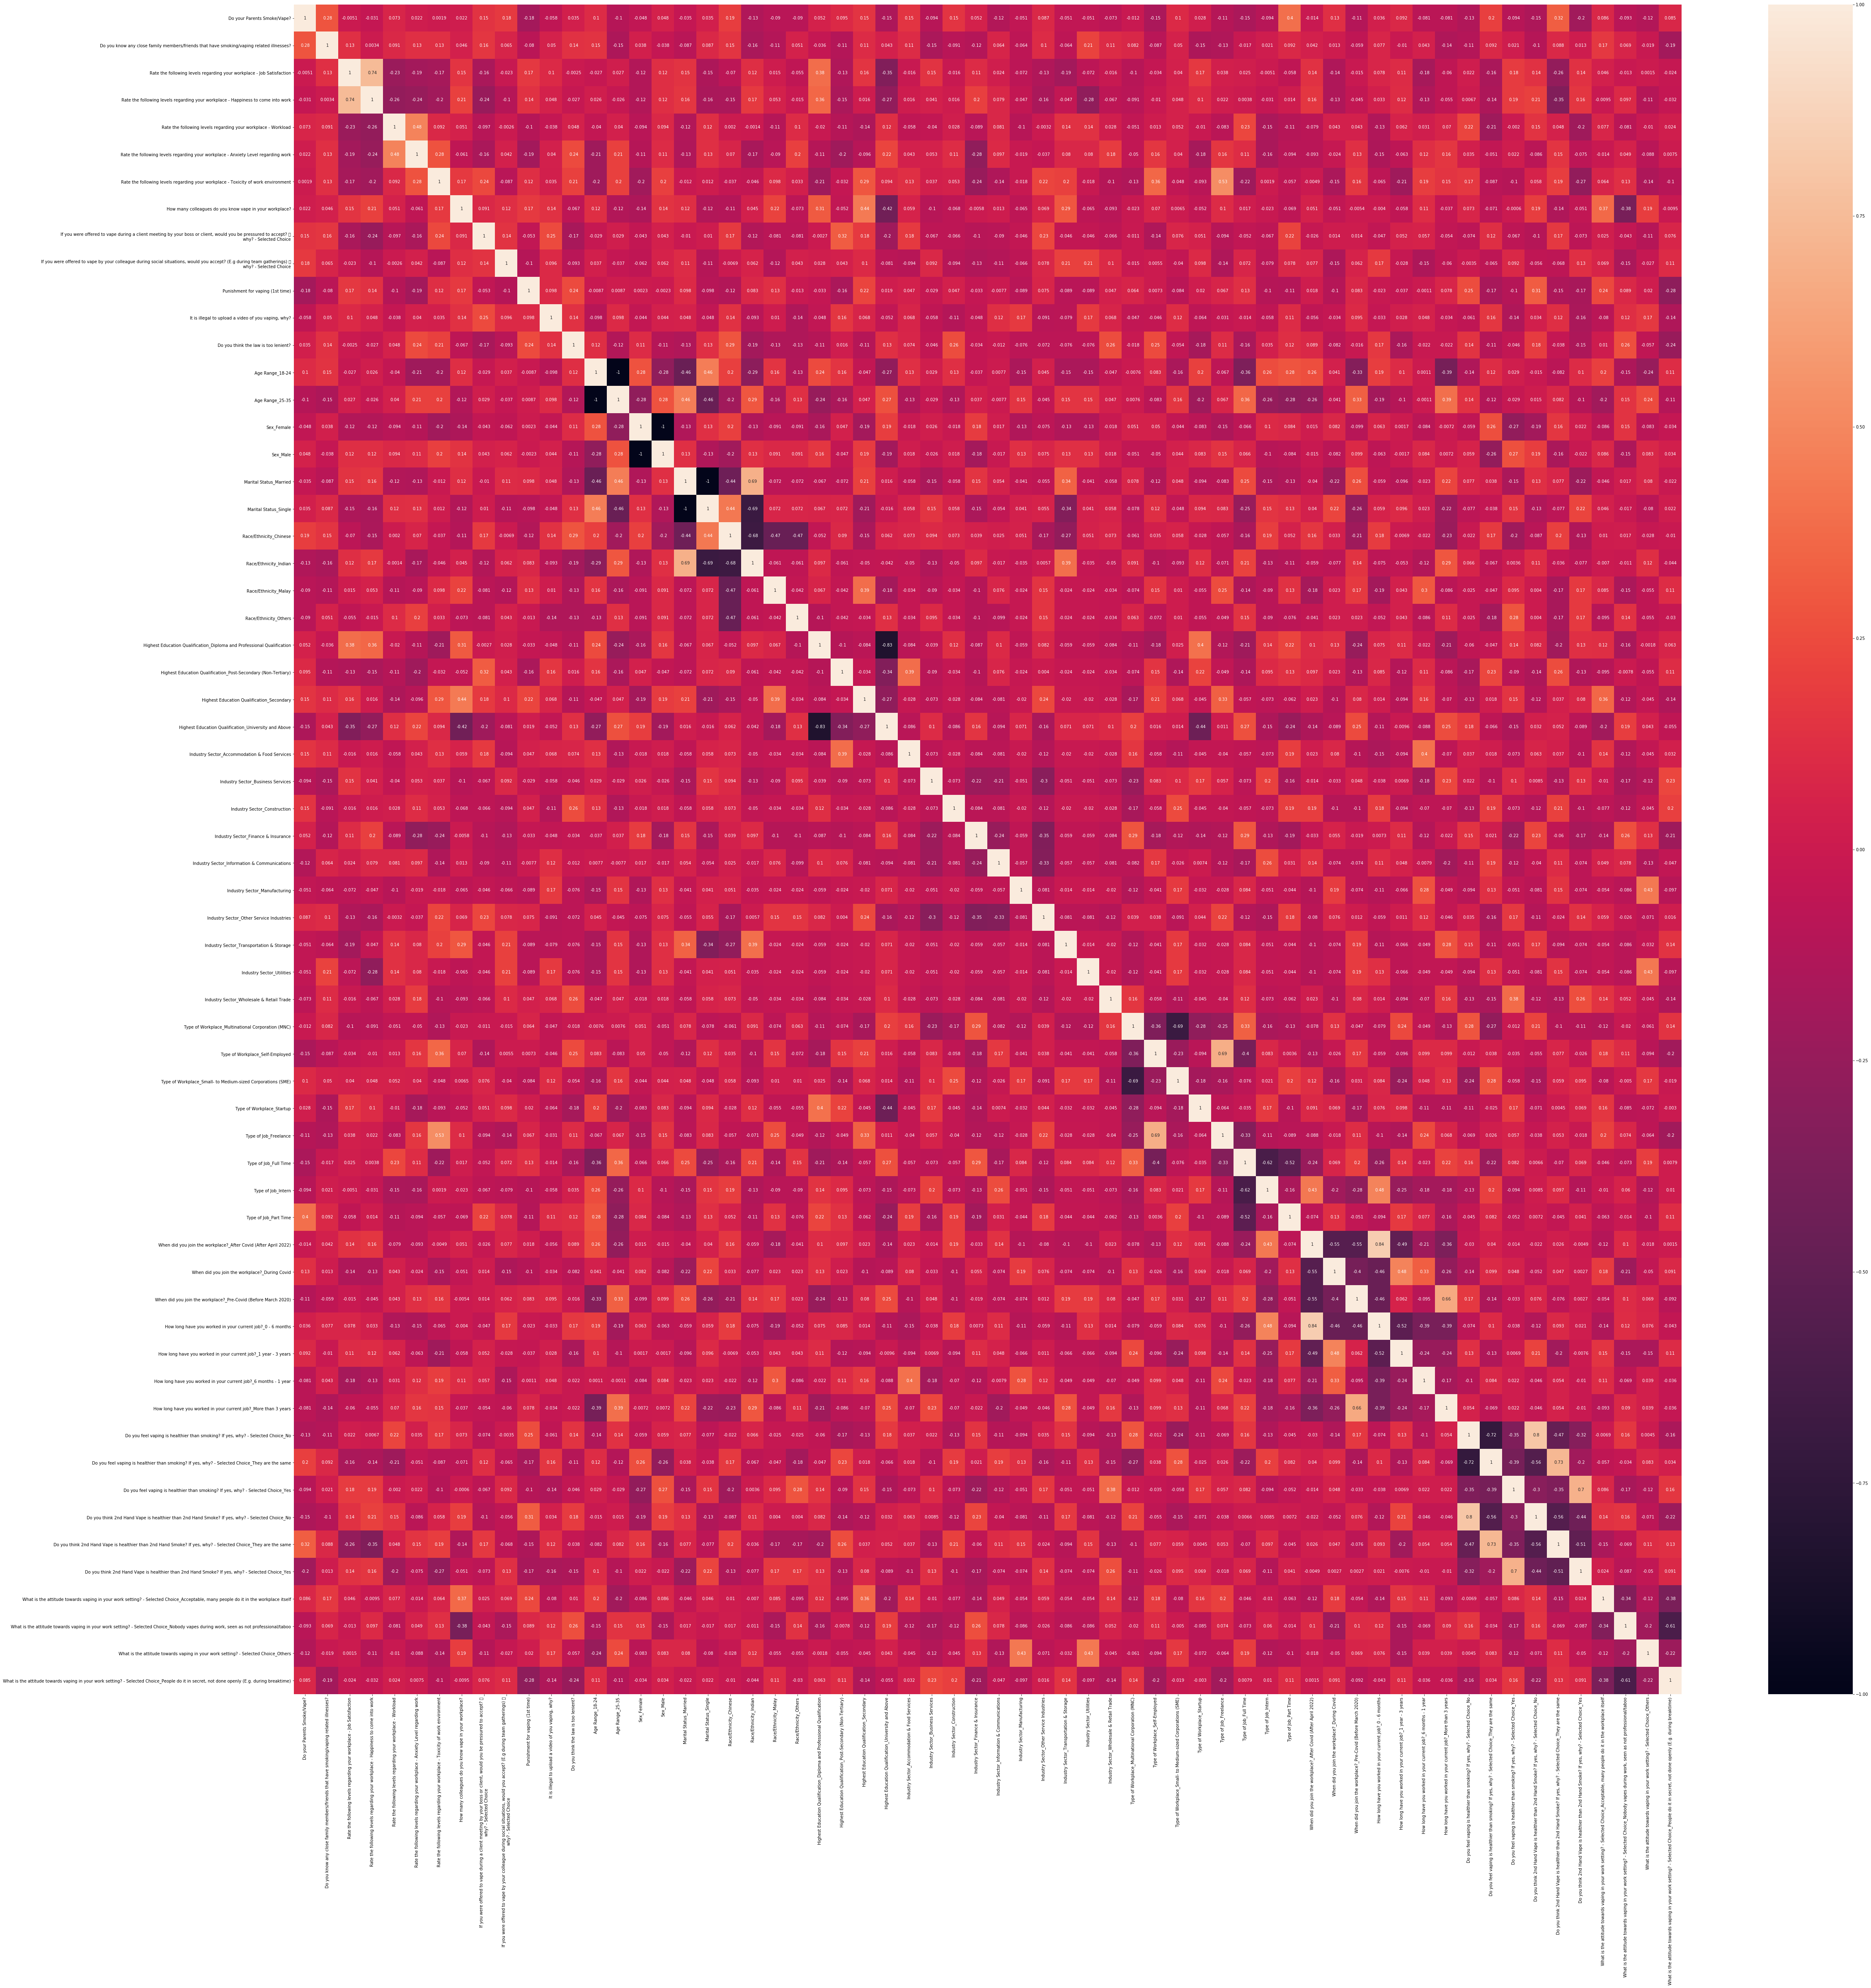

In [28]:
fig = plt.figure(figsize=(75, 75))
sns.heatmap(df_factors_encoded.corr(), annot=True)
plt.savefig("Heatmap.png")

In [29]:
df[df["If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice"] == "Yes"]["Have you vaped before?"].value_counts()

Yes    15
No      3
Name: Have you vaped before?, dtype: int64

<a id="logistic"></a>
<h1>Logistic Regression</h1>

In [30]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [31]:
x = df_factors_encoded

In [32]:
y = df['Have you vaped before?'].map({"Yes":1,"No":0})

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [34]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(penalty='l1',solver = 'liblinear', random_state = 99)

lmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=99, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lmodel.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.16786871,
        -0.20157359,  0.01651307,  0.14957419,  0.        ,  2.77048141,
        -0.47813664, -0.68020262, -0.08236699,  0.        ,  0.        ,
        -1.11650234,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.01344083,  0.6938558 ,  0.        ,
         0.        ,  1.68364309, -0.23000051,  0.        ,  0.        ,
         0.        , -0.10053249,  1.32949785, -0.67998505,  0.        ,
         0.        ,  0.        ,  0.        ,  0.69295109,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [36]:
# Store the coefficients in a Series along with the column names
lm_coef = pd.DataFrame(lmodel.coef_[0], index = x.columns, columns = ["importance"])
lm_coef = lm_coef.sort_values(by = ["importance"], ascending=False)
lm_coef
# Sort the absolute values of the coefficients 
# sorted_coef = lm_coef.sort_values(key=pd.Series.abs)

,importance
"If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",2.770481
Type of Job_Freelance,1.683643
When did you join the workplace?_Pre-Covid (Before March 2020),1.329498
Type of Workplace_Self-Employed,0.693856
"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same",0.692951
...,...
Type of Job_Full Time,-0.230001
Punishment for vaping (1st time),-0.478137
How long have you worked in your current job?_0 - 6 months,-0.679985
"It is illegal to upload a video of you vaping, why?",-0.680203


C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


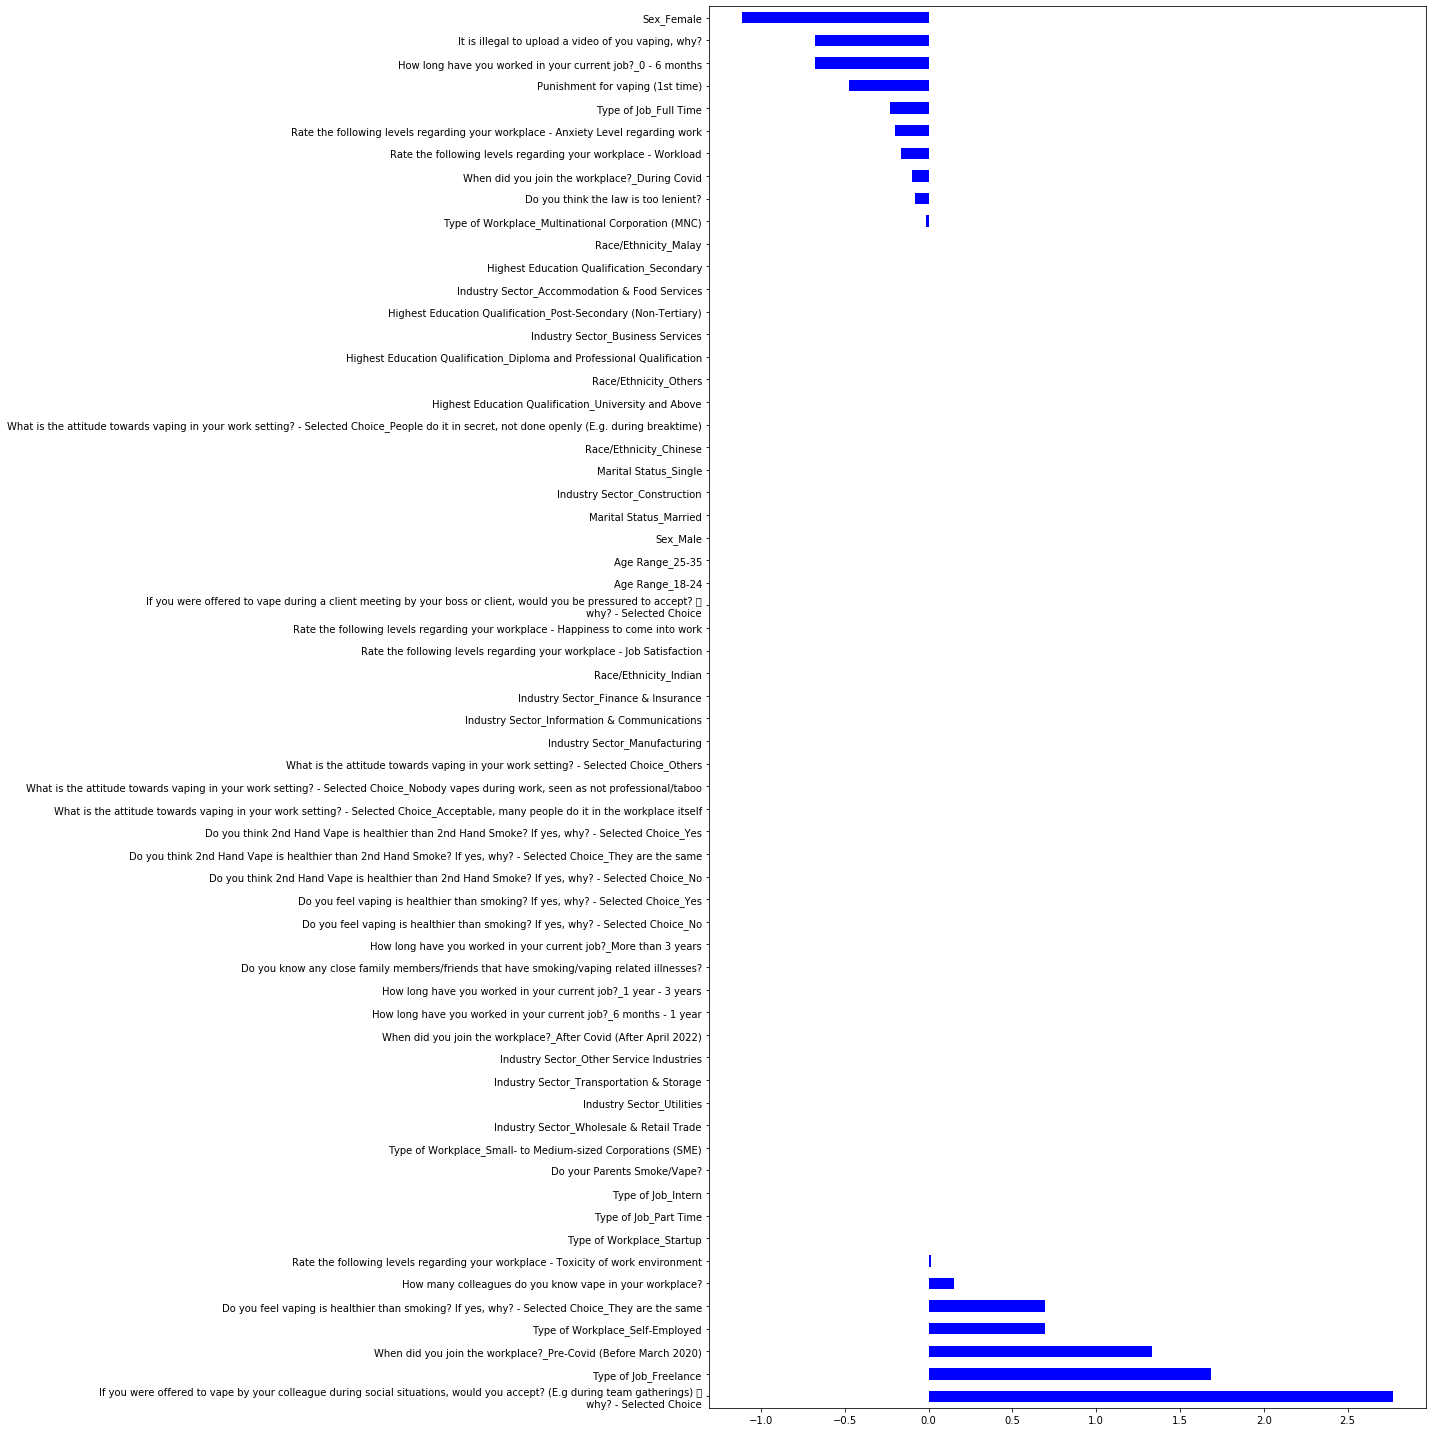

In [37]:
# Make a horizontal bar plot

# find out the odds of being successful and being a factor
lm_coef["importance"].plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [38]:
lm_coef = lm_coef[lm_coef["importance"] != 0]
lm_coef

,importance
"If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",2.770481
Type of Job_Freelance,1.683643
When did you join the workplace?_Pre-Covid (Before March 2020),1.329498
Type of Workplace_Self-Employed,0.693856
"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same",0.692951
How many colleagues do you know vape in your workplace?,0.149574
Rate the following levels regarding your workplace - Toxicity of work environment,0.016513
Type of Workplace_Multinational Corporation (MNC),-0.013441
Do you think the law is too lenient?,-0.082367
When did you join the workplace?_During Covid,-0.100532


In [39]:
lm_coef.index

Index(['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Type of Job_Freelance',
       'When did you join the workplace?_Pre-Covid (Before March 2020)',
       'Type of Workplace_Self-Employed',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same',
       'How many colleagues do you know vape in your workplace?',
       'Rate the following levels regarding your workplace - Toxicity of work environment',
       'Type of Workplace_Multinational Corporation (MNC)',
       'Do you think the law is too lenient?',
       'When did you join the workplace?_During Covid',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Type of Job_Full Time', 'Punishment for vaping (1st time)',
       'How long have you worked in yo

In [40]:
y_pred1 = lmodel.predict(X_test)

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test, y_pred1),2))

Accuracy for LogisticRegression :
0.87


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1, labels = [1,0]))

[[ 3  2]
 [ 0 10]]


In [42]:
cnf_matrix1 = confusion_matrix(y_test, y_pred1, labels = [1,0])
cf1 = pd.DataFrame(cnf_matrix1, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf1

,Predicted pos,Predicted neg
Actual pos,3,2
Actual neg,0,10


In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 1.0
Precision : 1.0
Recall or Sensitivity : 0.6


<a id="overfit"></a>
<h1>Logistic Regression (reducing overfitting)</h1>

In [55]:
df_factors2 = df_factors_encoded[['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Type of Job_Freelance',
       'When did you join the workplace?_Pre-Covid (Before March 2020)',
       'Type of Workplace_Self-Employed',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same',
       'How many colleagues do you know vape in your workplace?',
       'Rate the following levels regarding your workplace - Toxicity of work environment',
       'Type of Workplace_Multinational Corporation (MNC)',
       'Do you think the law is too lenient?',
       'When did you join the workplace?_During Covid',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Type of Job_Full Time', 'Punishment for vaping (1st time)',
       'How long have you worked in your current job?_0 - 6 months',
       'It is illegal to upload a video of you vaping, why?', 'Sex_Female']]
df_factors2

,"If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",Type of Job_Freelance,When did you join the workplace?_Pre-Covid (Before March 2020),Type of Workplace_Self-Employed,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same",How many colleagues do you know vape in your workplace?,Rate the following levels regarding your workplace - Toxicity of work environment,Type of Workplace_Multinational Corporation (MNC),Do you think the law is too lenient?,When did you join the workplace?_During Covid,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Type of Job_Full Time,Punishment for vaping (1st time),How long have you worked in your current job?_0 - 6 months,"It is illegal to upload a video of you vaping, why?",Sex_Female
0,0,0,1,0,1,1,1,1,0,0,3,1,1,1,0,0,0
1,0,0,1,0,0,0,3,0,1,0,4,4,1,0,0,1,0
2,0,0,0,0,0,0,3,1,1,1,5,4,1,1,0,0,0
3,0,0,1,0,0,3,2,1,0,0,4,3,1,1,0,1,0
4,1,0,0,0,1,2,2,0,0,0,4,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,0,0,0,0,2,1,0,0,1,4,2,1,1,0,0,0
70,0,1,1,1,0,10,5,0,0,0,3,2,0,1,0,0,0
71,0,0,0,0,1,1,2,1,0,1,2,2,0,0,0,1,1
72,0,1,0,1,1,3,3,0,0,1,5,4,0,0,0,0,1


In [56]:
x = df_factors2
y = df['Have you vaped before?'].map({"Yes":1,"No":0})

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [58]:
lmodel2 = LogisticRegression(penalty="l1",solver = 'liblinear', random_state = 99)

lmodel2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=99, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
lmodel2.coef_

array([[ 2.76996415,  1.68229144,  1.32966788,  0.69455664,  0.69264428,
         0.1495916 ,  0.01648568, -0.0136606 , -0.08325679, -0.1002881 ,
        -0.16853317, -0.20071745, -0.23002982, -0.47753863, -0.67963775,
        -0.68037135, -1.11639207]])

In [60]:
# Store the coefficients in a Series along with the column names
lm_coef2 = pd.DataFrame(lmodel2.coef_[0], index = x.columns, columns = ["importance"])
lm_coef2 = lm_coef2.sort_values(by = ["importance"], ascending=False)
lm_coef2

,importance
"If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",2.769964
Type of Job_Freelance,1.682291
When did you join the workplace?_Pre-Covid (Before March 2020),1.329668
Type of Workplace_Self-Employed,0.694557
"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same",0.692644
How many colleagues do you know vape in your workplace?,0.149592
Rate the following levels regarding your workplace - Toxicity of work environment,0.016486
Type of Workplace_Multinational Corporation (MNC),-0.013661
Do you think the law is too lenient?,-0.083257
When did you join the workplace?_During Covid,-0.100288


C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


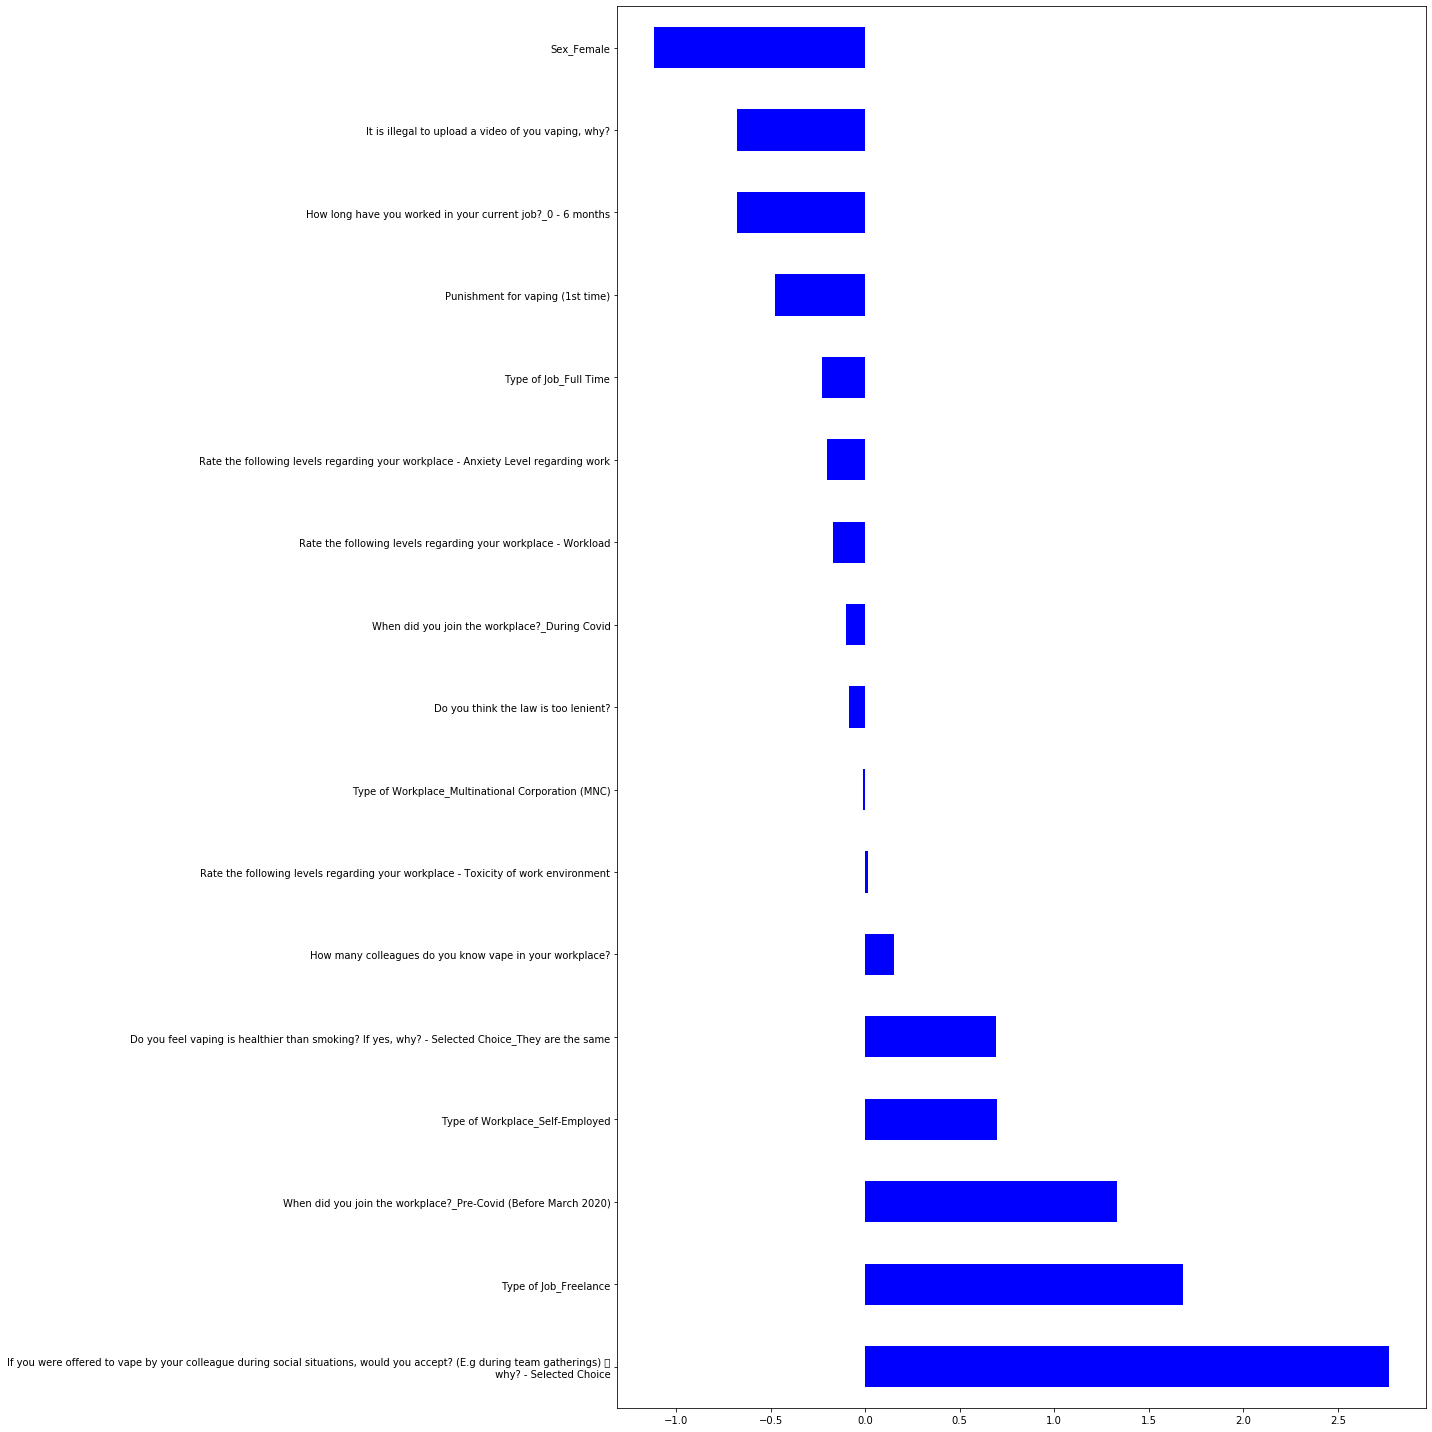

In [61]:
lm_coef2["importance"].plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [62]:
y_pred1 = lmodel2.predict(X_test2)

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test2, y_pred1),2))

Accuracy for LogisticRegression :
0.87


In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2, y_pred1, labels = [1,0]))

[[ 3  2]
 [ 0 10]]


In [64]:
cnf_matrix1 = confusion_matrix(y_test2, y_pred1, labels = [1,0])
cf1 = pd.DataFrame(cnf_matrix1, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf1

,Predicted pos,Predicted neg
Actual pos,3,2
Actual neg,0,10


In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 1.0
Precision : 1.0
Recall or Sensitivity : 0.6


<a id="forest"></a>
<h1>Random Forest</h1 

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rf.feature_importances_

array([0.0138722 , 0.01155518, 0.02118445, 0.03022297, 0.03683569,
       0.03038695, 0.04396996, 0.08317505, 0.01608514, 0.11058722,
       0.01761479, 0.01190876, 0.01605116, 0.00990813, 0.0077588 ,
       0.02476456, 0.02281094, 0.01182225, 0.00911937, 0.00635559,
       0.00743066, 0.00283416, 0.00140208, 0.01113112, 0.00084937,
       0.00498858, 0.01773327, 0.0001802 , 0.02101234, 0.00073894,
       0.01068101, 0.0143926 , 0.        , 0.01535154, 0.00256693,
       0.        , 0.00041425, 0.01504627, 0.03560628, 0.01278414,
       0.00275521, 0.03983132, 0.01225539, 0.01236435, 0.00584984,
       0.01211856, 0.01462136, 0.04542313, 0.01310448, 0.00899507,
       0.00576215, 0.01373168, 0.01220922, 0.01620829, 0.00619594,
       0.00701995, 0.00793428, 0.01110255, 0.00800794, 0.0138076 ,
       0.00508836, 0.01448045])

In [68]:
# Create a pandas series(single columns data structure) with features importances
importances_rf_feat = pd.Series(rf.feature_importances_, index = x.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf_feat.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()


ValueError: Length of values (62) does not match length of index (17)

<a id="decision"></a>
<h1>Decision Tree</h1>

In [41]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split functions
from sklearn.model_selection import train_test_split

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [79]:
# Instantiate dt and criterion can be gini or entropy
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 99)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [80]:
from sklearn.tree import export_graphviz
import pydotplus
#from sklearn.externals.six import StringIO  
import six
from six import StringIO
from IPython.display import Image

feature_cols = X_train.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankTree.png')
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: Error: not well-formed (invalid token) in line 1 
... <HTML>Industry Sector_Finance & Insurance &le; 0.5 ...
in label of node 6


In [ ]:
feat_impt = pd.Series(dt.feature_importances_, index = X_train.columns)

# Sort the variable importance
sorted_feat_impt = feat_impt.sort_values()


C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


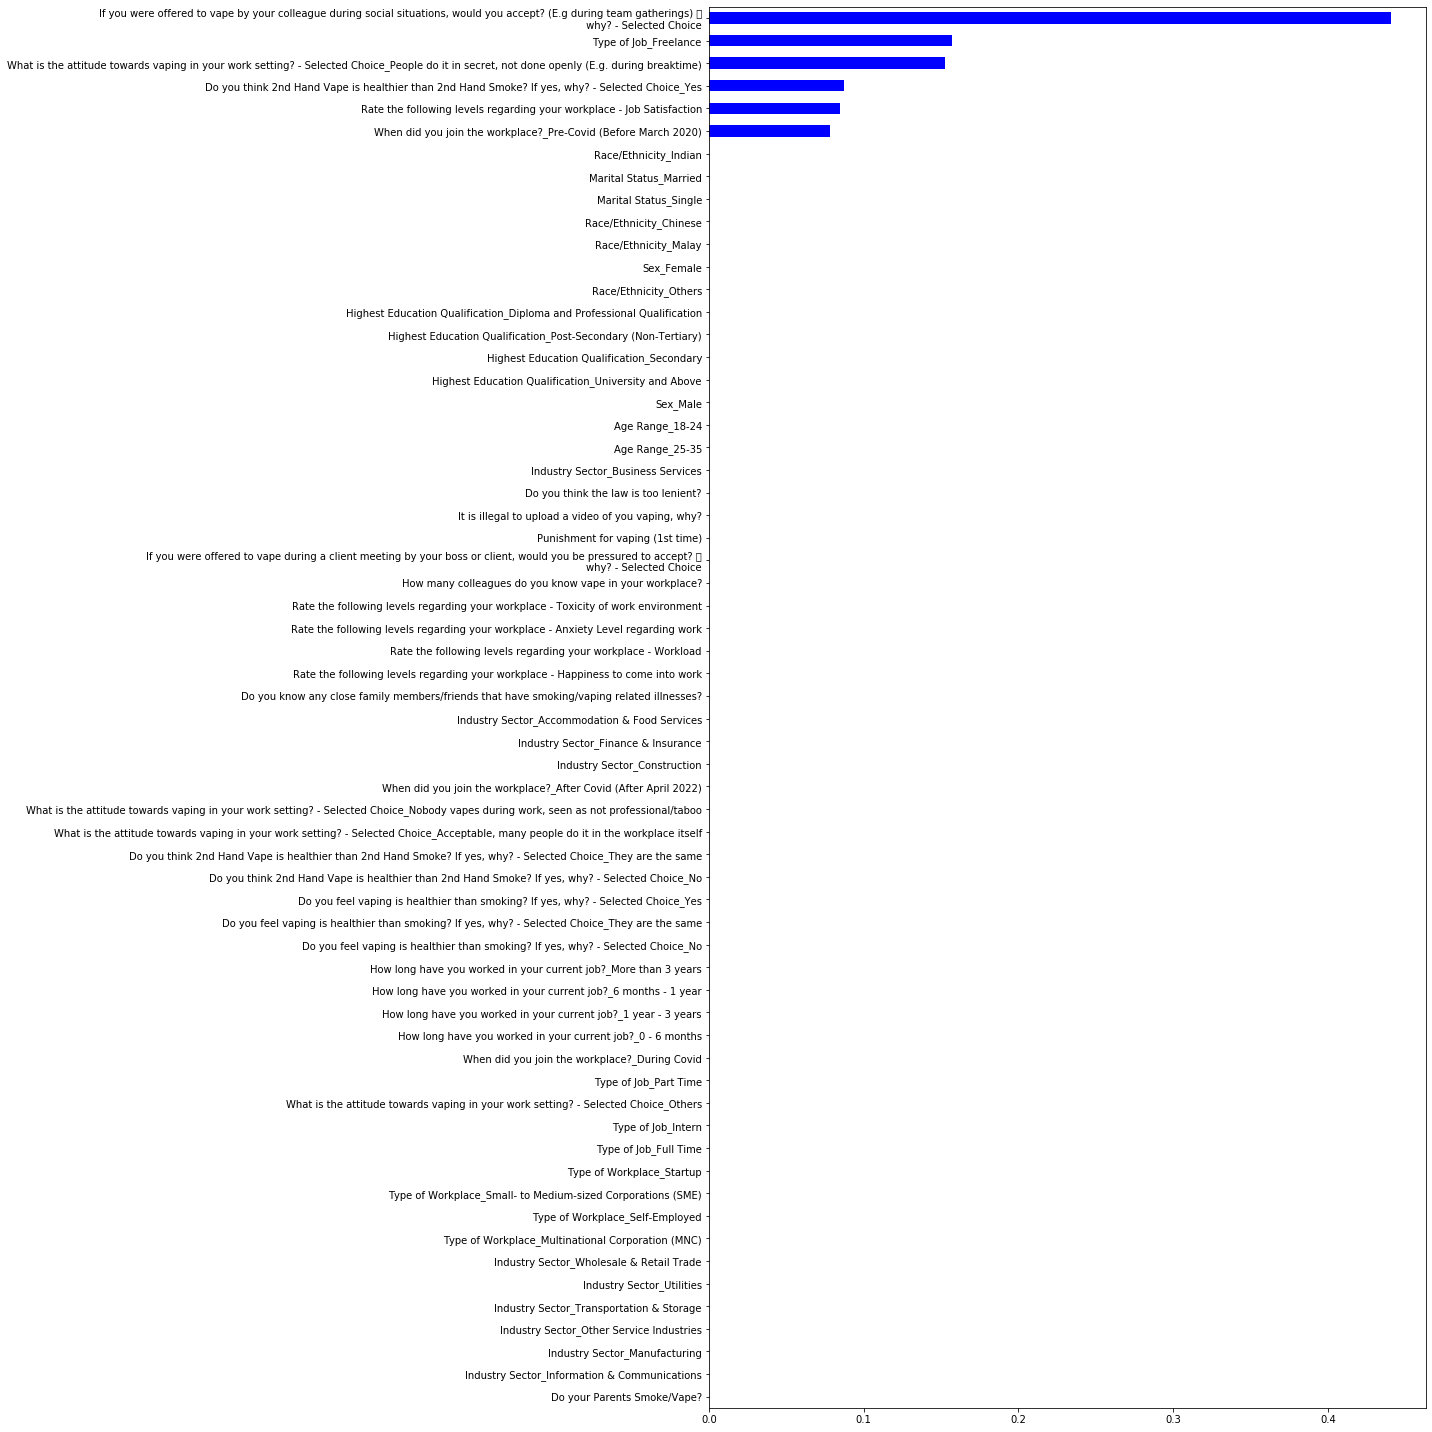

In [81]:
# Make a horizontal bar plot
sorted_feat_impt.plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [82]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 1 0 1 0 1 0 1 1]


In [83]:
#Print the accuracy of labels predicted.

print("Accuracy for Decision Tree :")
print(round(accuracy_score(y_test, y_pred), 3)) #comparing the actual target with the prediction

Accuracy for Decision Tree :
0.8


In [84]:
#Confusion matrix
# label = 1 = subscribed to term deposit 

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

,Predicted pos,Predicted neg
Actual pos,4,0
Actual neg,3,8


In [85]:
print(type(cnf_matrix))
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

<class 'numpy.ndarray'>


,Predicted pos,Predicted neg
Actual pos,4,0
Actual neg,3,8


In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)

print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))

Specificity : 0.73
Precision : 0.57
Recall or Sensitivity : 1.0


max depth:
2 - Accuracy = 0.8
Specificity = 0.91
Precision = 0.67
Recall = 0.5

3 - Accuracy = 0.8
Specificity = 0.82
Precision = 0.6
Recall = 0.75

4 - Same as 3

5 - Accuracy = 0.8
Specificity = 0.73
Precision = 0.57
Recall = 1.0


<a id=social></a>
<h1>Logistic Regression for Social Smoking</h1>

In [250]:
df_vapers = df[df['Have you vaped before?'] == 'Yes']

In [251]:
df_vapers.count()

Recorded Date                                                                                                                                         24
Response ID                                                                                                                                           24
Age Range                                                                                                                                             24
Sex                                                                                                                                                   24
Marital Status                                                                                                                                        24
Race/Ethnicity                                                                                                                                        24
Highest Education Qualification                                                   

In [252]:
df_social = df_vapers[['Age Range', 'Sex', 'Marital Status',
       'Race/Ethnicity', 'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
       'Do your Parents Smoke/Vape?',
       'How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable',
       'Do your parents know about your vaping habits?',
       'Do you know any close family members/friends that have smoking/vaping related illnesses?',
       'Rate the following levels regarding your workplace - Job Satisfaction',
       'Rate the following levels regarding your workplace - Happiness to come into work',
       'Rate the following levels regarding your workplace - Workload',
       'Rate the following levels regarding your workplace - Anxiety Level regarding work',
       'Rate the following levels regarding your workplace - Toxicity of work environment',
       'How many colleagues do you know vape in your workplace?',
       'What is the attitude towards vaping in your work setting? - Selected Choice',
       'If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice',
       'If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice',
       'Punishment for vaping (1st time)',
       'It is illegal to upload a video of you vaping, why?',
       'Do you think the law is too lenient?']]

In [253]:
df_social

,Age Range,Sex,Marital Status,Race/Ethnicity,Highest Education Qualification,Industry Sector,Type of Workplace,Type of Job,When did you join the workplace?,How long have you worked in your current job?,...,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,What is the attitude towards vaping in your work setting? - Selected Choice,"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice","If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice",Punishment for vaping (1st time),"It is illegal to upload a video of you vaping, why?",Do you think the law is too lenient?
0,25-35,Male,Married,Indian,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),More than 3 years,...,3,1,1,1,Others,No,No,Fine up to $500,Act of Vaping,No
4,18-24,Male,Single,Chinese,Post-Secondary (Non-Tertiary),Other Service Industries,Startup,Full Time,After Covid (After April 2022),0 - 6 months,...,4,2,2,2,"People do it in secret, not done openly (E.g. ...",Yes,Yes,Warning,Considered Promoting and Advertising Vape,No
6,25-35,Male,Married,Indian,University and Above,Transportation & Storage,Small- to Medium-sized Corporations (SME),Full Time,Pre-Covid (Before March 2020),More than 3 years,...,5,4,4,10,"People do it in secret, not done openly (E.g. ...",No,Yes,Fine up to $2000,Act of Vaping,No
8,25-35,Male,Married,Indian,Diploma and Professional Qualification,Information & Communications,Multinational Corporation (MNC),Full Time,After Covid (After April 2022),0 - 6 months,...,3,4,1,2,"People do it in secret, not done openly (E.g. ...",No,Yes,Fine up to $2000,Act of Vaping,No
9,25-35,Male,Married,Chinese,Secondary,Other Service Industries,Small- to Medium-sized Corporations (SME),Full Time,After Covid (After April 2022),0 - 6 months,...,3,3,3,11,"Acceptable, many people do it in the workplace...",Yes,Yes,Fine up to $500,Considered Promoting and Advertising Vape,No
10,18-24,Male,Single,Chinese,Diploma and Professional Qualification,Other Service Industries,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),1 year - 3 years,...,5,4,2,5,"People do it in secret, not done openly (E.g. ...",No,No,Fine up to $500,Possession of Vape Device,No
19,18-24,Female,Single,Chinese,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,Pre-Covid (Before March 2020),1 year - 3 years,...,3,2,2,0,"Nobody vapes during work, seen as not professi...",Yes,No,Warning,Possession of Vape Device,No
20,18-24,Male,Single,Chinese,Diploma and Professional Qualification,Other Service Industries,Small- to Medium-sized Corporations (SME),Part Time,After Covid (After April 2022),0 - 6 months,...,5,2,2,3,"People do it in secret, not done openly (E.g. ...",No,Yes,Fine up to $2000,Possession of Vape Device,No
22,18-24,Female,Single,Chinese,University and Above,Business Services,Self-Employed,Full Time,Pre-Covid (Before March 2020),More than 3 years,...,4,4,2,3,"People do it in secret, not done openly (E.g. ...",No,Yes,Fine up to $2000,Possession of Vape Device,No
23,18-24,Female,Single,Chinese,University and Above,Finance & Insurance,Multinational Corporation (MNC),Full Time,After Covid (After April 2022),0 - 6 months,...,4,3,2,0,"Nobody vapes during work, seen as not professi...",No,Yes,Fine up to $500,Considered Promoting and Advertising Vape,Yes


In [254]:
punishments = {"Fine up to $500":1,"Warning":0,"Fine up to $2000":0,"Jail up to 1 year":0}

In [255]:
df_social["Punishment for vaping (1st time)"] = df_social["Punishment for vaping (1st time)"].map(punishments)

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [256]:
illegal = {"Considered Promoting and Advertising Vape":1,"Possession of Vape Device":0,"Act of Vaping":0}

In [257]:
df_social["It is illegal to upload a video of you vaping, why?"] = df_social["It is illegal to upload a video of you vaping, why?"].map(illegal)

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
df_social['Do you think the law is too lenient?'] = df_social['Do you think the law is too lenient?'].map({"Yes":1,"No":0})

df_social['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'] = df_social['If you were offered to vape by your colleague during social situations, would you accept? (E.g during team gatherings) \r\n why? - Selected Choice'].map({"Yes":1,"No":0})

df_social['If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice'] = df_social['If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice'].map({"Yes":1,"No":0})

df_social['Do you know any close family members/friends that have smoking/vaping related illnesses?'] = df_social['Do you know any close family members/friends that have smoking/vaping related illnesses?'].map({"Yes":1,"No":0})

df_social['Do your Parents Smoke/Vape?'] = df_social['Do your Parents Smoke/Vape?'].map({"Yes":1,"No":0})

df_social['Do your parents know about your vaping habits?'] = df_social['Do your parents know about your vaping habits?'].map({"Yes":1,"No":0,np.NAN:0})

C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\99zhe\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [259]:
df_social['Do you know any close family members/friends that have smoking/vaping related illnesses?'].value_counts()

0    19
1     5
Name: Do you know any close family members/friends that have smoking/vaping related illnesses?, dtype: int64

In [260]:
df_social_encoded = pd.get_dummies(data=df_social, columns=['Age Range', 'Sex', 'Marital Status', 'Race/Ethnicity',
       'Highest Education Qualification', 'Industry Sector',
       'Type of Workplace', 'Type of Job', 'When did you join the workplace?',
       'How long have you worked in your current job?',
       'How long have you been vaping for?',
       'Why did you start vaping despite its illegality? - Selected Choice',
       'Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice',
       'Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice',
        "What is the attitude towards vaping in your work setting? - Selected Choice"])

In [261]:
df_social_encoded.isna().any()[lambda x: x]

Series([], dtype: bool)

In [262]:
df_social_encoded

,Do your Parents Smoke/Vape?,"How comfortable would you be in having vaping related conversations with your parents? - From 1 - Not Comfortable at all, to 5 - Very Comfortable",Do your parents know about your vaping habits?,Do you know any close family members/friends that have smoking/vaping related illnesses?,Rate the following levels regarding your workplace - Job Satisfaction,Rate the following levels regarding your workplace - Happiness to come into work,Rate the following levels regarding your workplace - Workload,Rate the following levels regarding your workplace - Anxiety Level regarding work,Rate the following levels regarding your workplace - Toxicity of work environment,How many colleagues do you know vape in your workplace?,...,"Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_No","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_They are the same","Do you feel vaping is healthier than smoking? If yes, why? - Selected Choice_Yes","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_No","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_They are the same","Do you think 2nd Hand Vape is healthier than 2nd Hand Smoke? If yes, why? - Selected Choice_Yes","What is the attitude towards vaping in your work setting? - Selected Choice_Acceptable, many people do it in the workplace itself","What is the attitude towards vaping in your work setting? - Selected Choice_Nobody vapes during work, seen as not professional/taboo",What is the attitude towards vaping in your work setting? - Selected Choice_Others,"What is the attitude towards vaping in your work setting? - Selected Choice_People do it in secret, not done openly (E.g. during breaktime)"
0,0,1,0,0,4,3,3,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,3,3,4,2,2,2,...,0,1,0,0,1,0,0,0,0,1
6,0,1,0,0,2,3,5,4,4,10,...,1,0,0,1,0,0,0,0,0,1
8,0,5,0,0,5,5,3,4,1,2,...,0,1,0,0,1,0,0,0,0,1
9,1,5,1,1,5,3,3,3,3,11,...,0,1,0,0,1,0,1,0,0,0
10,0,2,0,0,5,4,5,4,2,5,...,1,0,0,1,0,0,0,0,0,1
19,0,3,0,1,2,3,3,2,2,0,...,0,1,0,0,0,1,0,1,0,0
20,1,5,1,1,5,5,5,2,2,3,...,0,0,1,0,0,1,0,0,0,1
22,0,1,0,0,3,3,4,4,2,3,...,1,0,0,0,0,1,0,0,0,1
23,0,1,0,0,3,3,4,3,2,0,...,1,0,0,1,0,0,0,1,0,0


In [263]:
df_vapers['Why did you start vaping despite its illegality? - Selected Choice']

0     Curiosity,Accessibility (Easy to do in many lo...
4                    Peer (Family and Friends) Pressure
6     Alternative to Smoking/ Nicotine Products,Acce...
8                                                Others
9          Accessibility (Easy to do in many locations)
10    Cheap/Affordable,Alternative to Smoking/ Nicot...
19                                            Curiosity
20    Cheap/Affordable,Other (Financial/Life Goals) ...
22    Cheap/Affordable,Other (Financial/Life Goals) ...
23                                            Curiosity
24    Peer (Family and Friends) Pressure,Workplace P...
26                                            Curiosity
30                                     Cheap/Affordable
41                                            Curiosity
44    Alternative to Smoking/ Nicotine Products,Acce...
47                                   Workplace Pressure
48                                            Curiosity
54    Curiosity,Accessibility (Easy to do in man

In [264]:
x = df_social_encoded
y = df_vapers['What is the frequency of your vape usage?'].map({"Only during social situations":1,
                                                                                  "A pod a day":0,
                                                                                 "More than a pod a week":0,
                                                                                 "Tried once":0,
                                                                                 "A pod a week":0})

In [265]:
y

0     0
4     1
6     0
8     0
9     0
10    1
19    1
20    0
22    0
23    1
24    0
26    1
30    1
41    1
44    0
47    1
48    0
54    1
55    0
57    1
59    1
69    0
70    0
72    0
Name: What is the frequency of your vape usage?, dtype: int64

In [266]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,
                                                          random_state = 99)

In [267]:
from sklearn.linear_model import LogisticRegression
lmodel3 = LogisticRegression(penalty='l1',solver = 'liblinear', random_state = 99)

lmodel3.fit(X_train3,y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=99, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [268]:
lmodel3.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.4213768 ,
         0.        ,  0.02809636,  0.        ,  0.        , -0.03250215,
         1.49607897,  0.        ,  0.        ,  0.43587124,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.44742879,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [269]:
lm_coef3 = pd.DataFrame(lmodel3.coef_[0], index = x.columns, columns = ["importance"])
lm_coef3 = lm_coef3[lm_coef3['importance'] != 0].sort_values(by = ["importance"], ascending=False)
lm_coef3

,importance
How long have you been vaping for?_0 - 6 Months,2.447429
"If you were offered to vape during a client meeting by your boss or client, would you be pressured to accept? \r\nwhy? - Selected Choice",1.496079
"It is illegal to upload a video of you vaping, why?",0.435871
Rate the following levels regarding your workplace - Workload,0.028096
How many colleagues do you know vape in your workplace?,-0.032502
Rate the following levels regarding your workplace - Job Satisfaction,-0.421377


C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\99zhe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


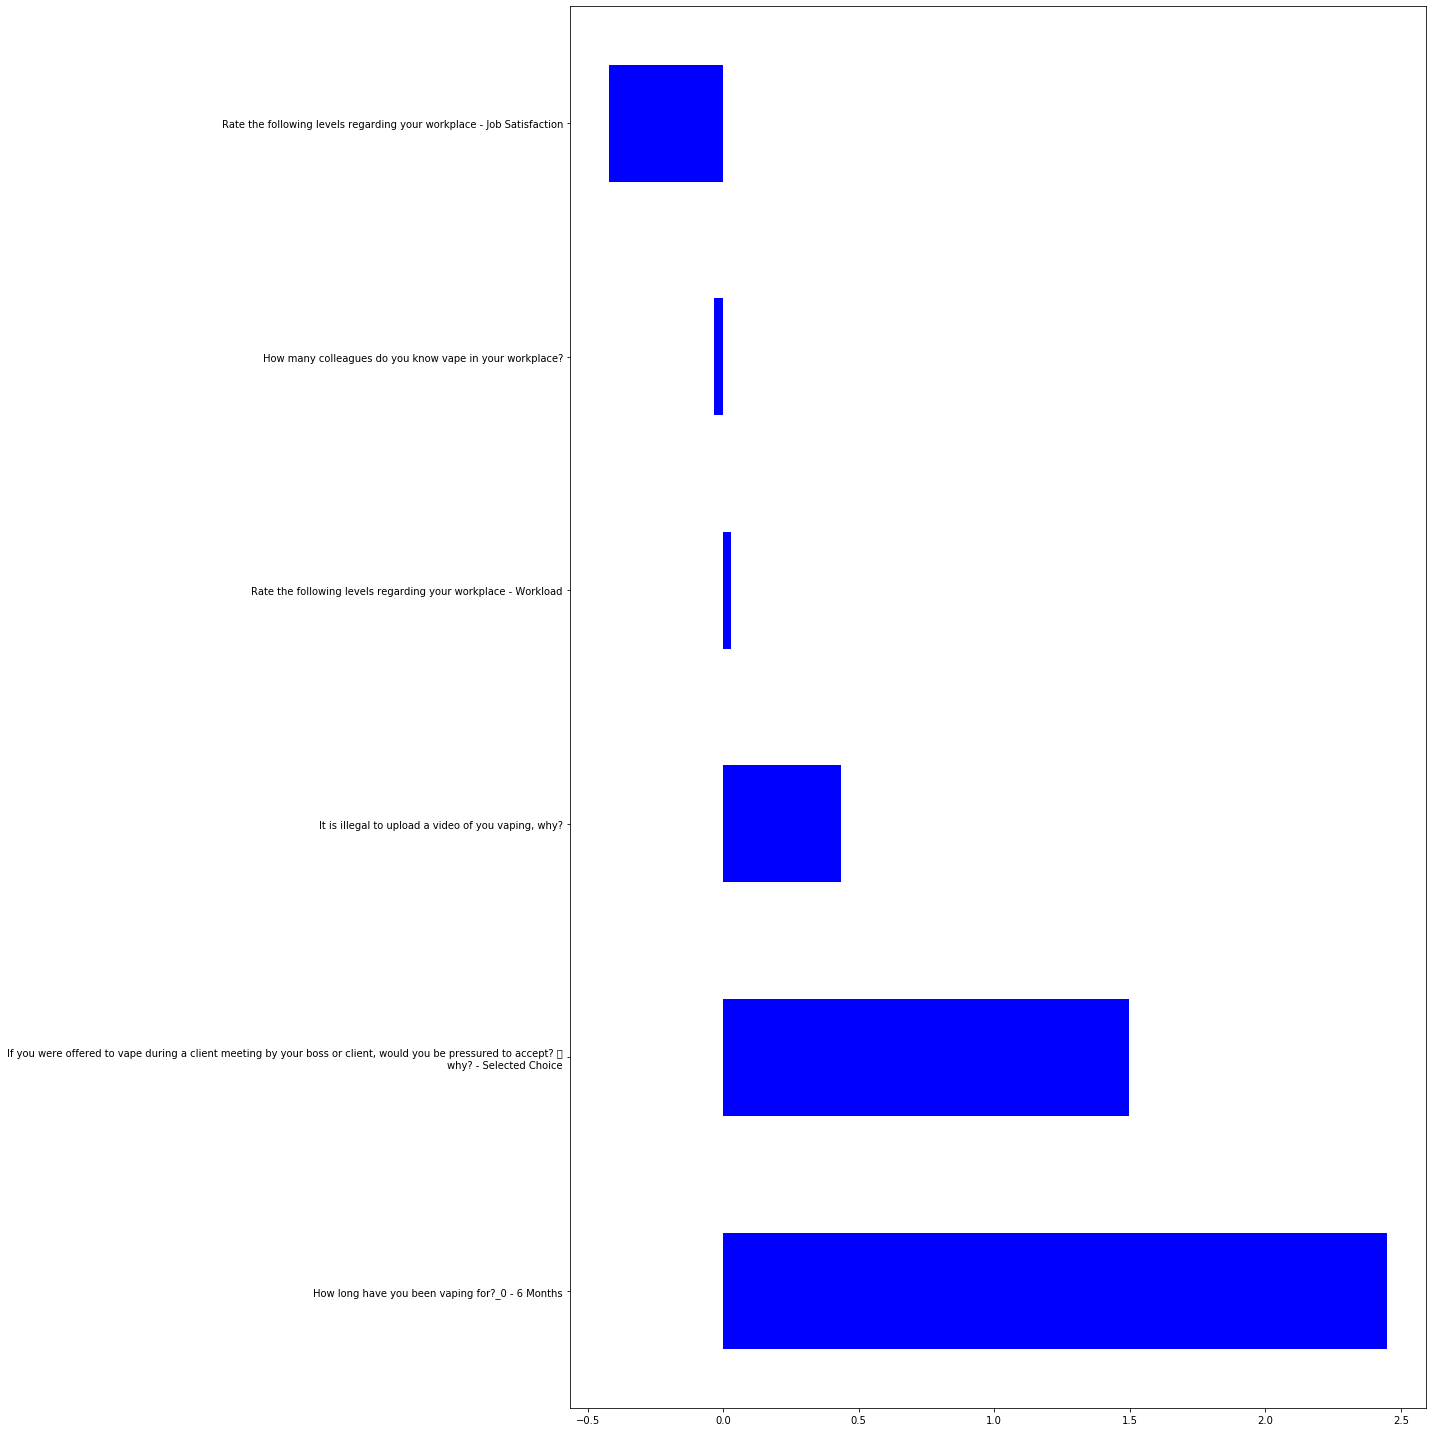

In [270]:
lm_coef3["importance"].plot(kind='barh', color='blue', figsize = (20,20))
plt.tight_layout()
plt.show()

In [271]:
y_pred3 = lmodel3.predict(X_test3)

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test3, y_pred3),2))

Accuracy for LogisticRegression :
0.8
